# Part 1: Data Review and Organization

## Read Excel file

In [1]:
import pandas as pd

org = r"C:\Users\aleja\OneDrive\Documentos\Desk AT\Sofia Health Project\1. Skills Assessment - Organization.xlsx"

xls = pd.ExcelFile(org)
print(xls.sheet_names)


['1 - Task Overview', '2 - Spreadsheet - raw data', '3 - Template to be used for sub']


## Review '2 - Spreadsheet - raw data' and correct Totals

In [2]:
df_raw = pd.read_excel(org, sheet_name='2 - Spreadsheet - raw data')

df_raw.head(10)

,Unnamed: 0,Sofia Health Veterans First Program Usage Report,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,Company 1- October 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Number of Employe Sign ups:,NaN,NaN,Participation Totals By Location,Staff,Family,NaN,New Memberships By Location,Staff,Family,NaN,Total Memberships By Location,Staff,Family,Nurses,Provideres,Clinical Associates,Suport,Other
3,NaN,Attending Class,8.0,NaN,April Office,0,0,NaN,April Office,1,0,NaN,April Office,74,0,7,2,2,13,23
4,NaN,Late Cancel,0.0,NaN,John Paul Medical Center,2,0,NaN,John Paul Medical Center,1,0,NaN,John Paul Medical Center,159,0,16,33,4,9,22
5,NaN,No-Show,13.0,NaN,Polis Medical Center,0,0,NaN,Polis Medical Center,0,0,NaN,Polis Medical Center,17,0,1,2,1,2,5
6,NaN,Total: Employees Registered for Classes,21.0,NaN,Karen Medical Center,0,0,NaN,Karen Medical Center,0,0,NaN,Karen Medical Center,0,0,0,0,0,0,0
7,NaN,NaN,NaN,NaN,David J. Clinic,1,0,NaN,David J. Clinic,2,0,NaN,David J. Clinic,53,0,14,4,3,5,11
8,NaN,Number of Family Sign ups:,NaN,NaN,Amanda Medical Center,0,0,NaN,Amanda Medical Center,2,0,NaN,Amanda Medical Center,119,0,6,6,1,4,14
9,NaN,Attending Class,0.0,NaN,William Medical Center,0,0,NaN,William Medical Center,0,0,NaN,William Medical Center,6,0,2,1,1,1,0


In [31]:
# Total Memberships by Location

df_total = pd.read_excel(
    xls,
    sheet_name="2 - Spreadsheet - raw data",
    header=None,
    skiprows=3,
    nrows=10,
    usecols="M:T"
)

df_total.columns = [
    "Location", "Staff", "Family", "Nurses", "Providers",
    "Associates", "Support", "Other"
]

cols_to_convert = ["Staff", "Family", "Nurses", "Providers", "Associates", "Support", "Other"]
df_total[cols_to_convert] = df_total[cols_to_convert].apply(pd.to_numeric, errors="coerce")

df_total["Row Total"] = df_total[cols_to_convert].sum(axis=1)

column_totals = df_total[cols_to_convert + ["Row Total"]].sum()

print("Clean table:")
print(df_total)
print("\nTotals per columna:")
print(column_totals)

Clean table:
                        Location  Staff  Family  Nurses  Providers  \
0  Total Memberships By Location    NaN     NaN     NaN        NaN   
1                   April Office   74.0     0.0     7.0        2.0   
2       John Paul Medical Center  159.0     0.0    16.0       33.0   
3          Polis  Medical Center   17.0     0.0     1.0        2.0   
4          Karen  Medical Center    0.0     0.0     0.0        0.0   
5               David J. Clinic    53.0     0.0    14.0        4.0   
6          Amanda Medical Center  119.0     0.0     6.0        6.0   
7         William Medical Center    6.0     0.0     2.0        1.0   
8          Junior Medical Center   32.0     0.0     6.0        4.0   
9          Kaarin Medical Center   88.0     0.0    20.0       14.0   

   Associates  Support  Other  Row Total  
0         NaN      NaN    NaN        0.0  
1         2.0     13.0   23.0      121.0  
2         4.0      9.0   22.0      243.0  
3         1.0      2.0    5.0       28.0  
4

In [4]:
# New Memberships by Location

df_new = pd.read_excel(
    xls,
    sheet_name="2 - Spreadsheet - raw data",
    header=None,
    skiprows=3,
    nrows=10,
    usecols="I:K"
)

df_new.columns = ["Location", "Staff", "Family"]

cols_to_convert = ["Staff", "Family"]
df_new[cols_to_convert] = df_new[cols_to_convert].apply(pd.to_numeric, errors="coerce")

df_new["Row Total"] = df_new[cols_to_convert].sum(axis=1)

column_totals = df_new[cols_to_convert + ["Row Total"]].sum()

print("New Memberships by Location:")
print(df_new)
print("\nColumn Totals:")
print(column_totals)

New Memberships by Location:
                      Location  Staff  Family  Row Total
0  New Memberships By Location    NaN     NaN        0.0
1                 April Office    1.0     0.0        1.0
2     John Paul Medical Center    1.0     0.0        1.0
3        Polis  Medical Center    0.0     0.0        0.0
4        Karen  Medical Center    0.0     0.0        0.0
5             David J. Clinic     2.0     0.0        2.0
6        Amanda Medical Center    2.0     0.0        2.0
7       William Medical Center    0.0     0.0        0.0
8        Junior Medical Center    0.0     0.0        0.0
9        Kaarin Medical Center    0.0     0.0        0.0

Column Totals:
Staff        6.0
Family       0.0
Row Total    6.0
dtype: float64


In [5]:
# Participation Totals by Location

df_part = pd.read_excel(
    xls,
    sheet_name="2 - Spreadsheet - raw data",
    header=None,
    skiprows=3,
    nrows=10,
    usecols="E:G"
)

df_part.columns = ["Location", "Staff", "Family"]

cols_to_convert = ["Staff", "Family"]
df_part[cols_to_convert] = df_part[cols_to_convert].apply(pd.to_numeric, errors="coerce")

df_part["Row Total"] = df_part[cols_to_convert].sum(axis=1)

column_totals = df_part[cols_to_convert + ["Row Total"]].sum()

print("Participation Totals by Location:")
print(df_part)
print("\nColumn Totals:")
print(column_totals)

Participation Totals by Location:
                           Location  Staff  Family  Row Total
0  Participation Totals By Location    NaN     NaN        0.0
1                      April Office    0.0     0.0        0.0
2          John Paul Medical Center    2.0     0.0        2.0
3             Polis  Medical Center    0.0     0.0        0.0
4             Karen  Medical Center    0.0     0.0        0.0
5                  David J. Clinic     1.0     0.0        1.0
6             Amanda Medical Center    0.0     0.0        0.0
7            William Medical Center    0.0     0.0        0.0
8             Junior Medical Center    0.0     0.0        0.0
9             Kaarin Medical Center    0.0     0.0        0.0

Column Totals:
Staff        3.0
Family       0.0
Row Total    3.0
dtype: float64


In [6]:
# Employee Sign Ups

df_emp = pd.read_excel(
    xls,
    sheet_name="2 - Spreadsheet - raw data",
    header=None,
    skiprows=3,
    nrows=4,
    usecols="B:C"
)

df_emp.columns = ["Category", "Value"]

df_emp["Value"] = pd.to_numeric(df_emp["Value"], errors="coerce")

total_calc = df_emp["Value"].sum()

print("Employee Sign Ups:")
print(df_emp)
print(f"\nCalculated Total: {total_calc}")

Employee Sign Ups:
                       Category  Value
0  Number of  Employe Sign ups:    NaN
1               Attending Class    8.0
2                   Late Cancel    0.0
3                       No-Show   13.0

Calculated Total: 21.0


In [7]:
# Family Sign Ups

df_fam = pd.read_excel(
    xls,
    sheet_name="2 - Spreadsheet - raw data",
    header=None,
    skiprows=9,
    nrows=4,
    usecols="B:C"
)

df_fam.columns = ["Category", "Value"]

df_fam["Value"] = pd.to_numeric(df_fam["Value"], errors="coerce")

total_calc = df_fam["Value"].sum()

print("Family Sign Ups:")
print(df_fam)
print(f"\nCalculated Total: {total_calc}")

Family Sign Ups:
                     Category  Value
0  Number of Family Sign ups:    NaN
1             Attending Class    0.0
2                 Late Cancel    0.0
3                     No-Show    0.0

Calculated Total: 0.0


In [8]:
# Leer solo la fila 17 (índice 16), columnas B:C
df_attended = pd.read_excel(
    xls,
    sheet_name="2 - Spreadsheet - raw data",
    header=None,
    skiprows=16,
    nrows=1,
    usecols="B:C"
)

# Asignar nombres
df_attended.columns = ["Metric", "Value"]

# Convertir valor a numérico
df_attended["Value"] = pd.to_numeric(df_attended["Value"], errors="coerce")

# Mostrar
print("Total Classes Attended:")
print(df_attended)


Total Classes Attended:
                   Metric  Value
0  Total Classes Attended      7


In [9]:
# Class Attendance Details
df_classes = pd.read_excel(
    xls,
    sheet_name="2 - Spreadsheet - raw data",
    header=None,
    skiprows=17,
    usecols="E:O"
)

df_classes.columns = [
    "Date", "Day", "Time", "Category", "Class Name", "Instructor",
    "# Staff Registered", "# Family Registered", "# Attendees",
    "# Late Cancels", "# No Shows"
]

cols_to_convert = [
    "# Staff Registered", "# Family Registered", "# Attendees",
    "# Late Cancels", "# No Shows"
]
df_classes[cols_to_convert] = df_classes[cols_to_convert].apply(pd.to_numeric, errors="coerce")

df_classes = df_classes.dropna(subset=["Date", "Class Name"], how="all")

cols_to_sum = [
    "# Staff Registered", "# Family Registered", "# Attendees",
    "# Late Cancels", "# No Shows"
]

column_totals = df_classes[cols_to_sum].sum()

print("Totales por columna (Class Attendance Details):")
print(column_totals)


Totales por columna (Class Attendance Details):
# Staff Registered     21
# Family Registered     0
# Attendees             8
# Late Cancels          0
# No Shows             13
dtype: int64


## Calculate Total Classes Attended

In [10]:
total_classes_attended = df_classes["# Attendees"].sum()

total_classes_attended_df = pd.DataFrame({
    "Metric": ["Total Classes Attended"],
    "Value": [total_classes_attended]
})

print("Total Classes Attended:")
print(total_classes_attended_df)

Total Classes Attended:
                   Metric  Value
0  Total Classes Attended      8


## Calculate Total Classes Offered

In [11]:
total_classes_offered = df_classes.shape[0]

total_classes_offered_df = pd.DataFrame({
    "Metric": ["Total Classes Offered"],
    "Value": [total_classes_offered]
})

print("Total Classes Offered:")
print(total_classes_offered_df)

Total Classes Offered:
                  Metric  Value
0  Total Classes Offered     20


## Calculate Sign ups by Category

In [12]:
df_classes["Category"].value_counts()

df_signups_by_category = df_classes.groupby("Category")[
    ["# Staff Registered", "# Family Registered"]
].sum()

df_signups_by_category["Total Sign Ups"] = df_signups_by_category[
    ["# Staff Registered", "# Family Registered"]
].sum(axis=1)

df_signups_by_category = df_signups_by_category.sort_values("Total Sign Ups", ascending=False)

print("Class Sign ups by Category:")
print(df_signups_by_category)


Class Sign ups by Category:
                        # Staff Registered  # Family Registered  \
Category                                                          
Meditation/Mindfulness                   9                    0   
Yoga                                     8                    0   
Qigong                                   4                    0   

                        Total Sign Ups  
Category                                
Meditation/Mindfulness               9  
Yoga                                 8  
Qigong                               4  


## Calculate Most Popular Classes

In [13]:
pd.set_option("display.max_colwidth", None)

most_popular_classes = df_classes.groupby("Class Name")["# Attendees"].sum()

most_popular_classes = most_popular_classes.sort_values(ascending=False)

most_popular_df = most_popular_classes.reset_index()
most_popular_df.columns = ["Class Name", "Total Attendees"]

print("Most Popular Classes:")
print(most_popular_df.head(4))


Most Popular Classes:
                                                Class Name  Total Attendees
0  Stress Release Mindfulness: Finding Center Amidst Chaos                2
1  Affirming Prosperity of Gratitude with iRest Meditation                1
2            Core Vitality: Yoga to Strengthen and Empower                1
3             Finding Balance: iRest Yoga Nidra Breathwork                1


## Calculate Class Sign Ups

In [14]:
df_classes["Total Sign Ups"] = df_classes["# Staff Registered"] + df_classes["# Family Registered"]

signups_by_class = df_classes.groupby("Class Name")["Total Sign Ups"].sum().reset_index()

signups_by_class = signups_by_class.sort_values("Total Sign Ups", ascending=False)

print("Class Sign Ups:")
print(signups_by_class)

Class Sign Ups:
                                                                        Class Name  \
12                       Yoga at Your Desk: Easy Stretches for a Healthier Workday   
6                                       Qi Awakening: Qigong for Energy Activation   
7       Reconnecting with Your Heartfelt Desire: A Guided iRest Meditation Session   
9                          Stress Release Mindfulness: Finding Center Amidst Chaos   
0                          Affirming Prosperity of Gratitude with iRest Meditation   
1                                    Core Vitality: Yoga to Strengthen and Empower   
2                                     Finding Balance: iRest Yoga Nidra Breathwork   
3       Finding Peace Within: iRest Meditation to Let Go of Stress and Relax Fully   
4   Gentle Qigong for Breast Cancer Wellness: Relaxation, Purging, and Energy Flow   
5                                                    Harmony Flow: All Levels Yoga   
8            Restorative Yoga for Brea

## Class Attendance Details order

In [15]:
# Seleccionar las columnas necesarias
df_class_details = df_classes[[
    "Date", "Day", "Time", "Category", "Class Name", "Instructor",
    "# Staff Registered", "# Family Registered", "# Attendees",
    "# Late Cancels", "# No Shows"
]]

# Renombrar las columnas para que coincidan con lo que pediste
df_class_details.columns = [
    "Date", "Day", "Time", "Category", "Class Name", "Instructor",
    "# Staff Signed Up", "# Family Signed Up", "# Attendees",
    "# Late Cancels", "# No Shows"
]

# Ordenar por la columna "Date" en orden ascendente
df_class_details_sorted = df_class_details.sort_values("Date", ascending=True)

# Mostrar resultado
print("Class Attendance Details Sorted by Date:")
print(df_class_details_sorted)


Class Attendance Details Sorted by Date:
          Date        Day      Time                Category  \
0   10/02/2024  Wednesday   8:10 AM                    Yoga   
1   10/03/2024   Thursday   8:10 AM                    Yoga   
2   10/03/2024   Thursday  10:00 AM  Meditation/Mindfulness   
17  10/04/2024     Friday  10:15 AM                    Yoga   
5   10/09/2024  Wednesday  12:20 PM                  Qigong   
9   10/09/2024  Wednesday   4:00 PM  Meditation/Mindfulness   
4   10/09/2024  Wednesday  10:00 AM                    Yoga   
14  10/10/2024   Thursday  10:00 AM                  Qigong   
15  10/11/2024     Friday   8:00 AM                  Qigong   
3   10/13/2024     Sunday   6:30 PM  Meditation/Mindfulness   
12  10/14/2024     Monday   6:00 AM  Meditation/Mindfulness   
13  10/15/2024    Tuesday  11:00 AM  Meditation/Mindfulness   
6   10/17/2024   Thursday   7:00 AM  Meditation/Mindfulness   
7   10/17/2024   Thursday   4:30 PM  Meditation/Mindfulness   
8   10/23/2024

# Part 2: Data Visualization

## Extract document with corrections and import library for graphics

In [ ]:
import matplotlib.pyplot as plt

file_path = "Copia de 1. Skills Assessment - Organization.xlsx"

org_sub = pd.read_excel(file_path, sheet_name='3 - Template to be used for sub', header=None)

org_sub.head(30)


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Sofia Health Veterans First Program Usage Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Company 1 - Month - Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,12.0,Number of Employee Class Sign ups:,NaN,NaN,NaN,Participation Totals by Location:,NaN,NaN,NaN,NaN,...,NaN,NaN,Clinical Assoc.,NaN,NaN,NaN,Support,NaN,NaN,Other
6,NaN,Attending Class,8.0,NaN,NaN,Amanda Medical Center,NaN,NaN,NaN,NaN,...,NaN,NaN,2,NaN,NaN,NaN,13,NaN,NaN,23
7,NaN,Late Cancel,0.0,NaN,NaN,Karen Medical Center,NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,9,NaN,NaN,22
8,NaN,No-Show,13.0,NaN,NaN,William Medical Center,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,2,NaN,NaN,5
9,NaN,Total: Employees Signed up for Classes,21.0,NaN,NaN,Junior Medical Center,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0


## 1. Bar Chart: Class Sign-ups by Category

In [26]:
# Color palette
sofia_palette = ['#C8A2C8', '#5AC8B1', '#B6E2A1']

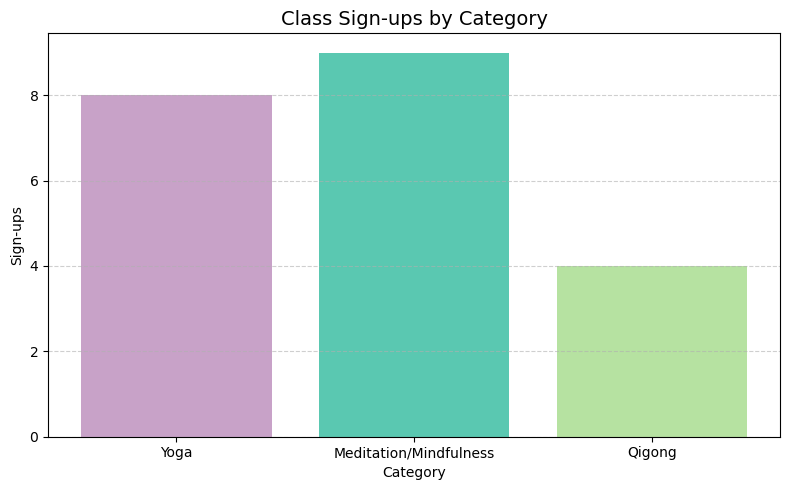

In [30]:
category_data = org_sub.iloc[22:25, [1, 2]].dropna()
category_data.columns = ['Category', 'Signups']

colors = ['#C8A2C8', '#5AC8B1', '#B6E2A1']

plt.figure(figsize=(8,5))
plt.bar(category_data['Category'], category_data['Signups'], color=colors)
plt.title('Class Sign-ups by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Sign-ups')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 2. Line Chart: Class Sign-ups (Employee + Family)

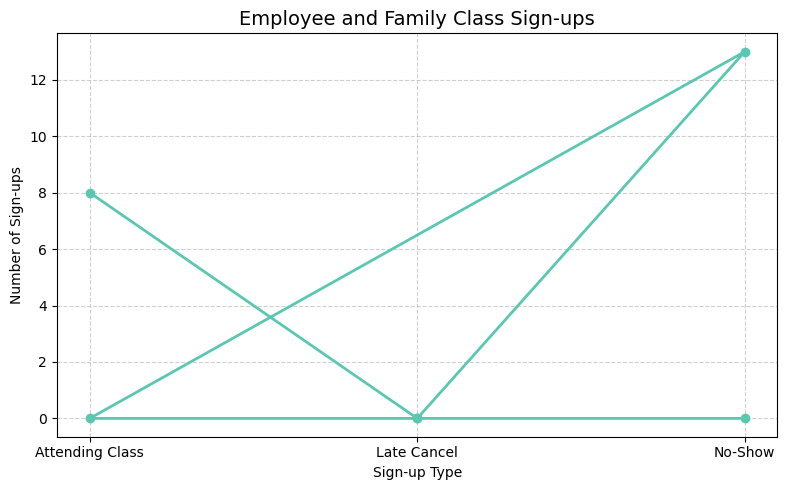

In [28]:
emp_data = org_sub.iloc[6:9, [1, 2]].dropna()
fam_data = org_sub.iloc[12:15, [1, 2]].dropna()

emp_data.columns = ['Type', 'Count']
fam_data.columns = ['Type', 'Count']

signup_data = pd.concat([emp_data, fam_data], ignore_index=True)

plt.figure(figsize=(8,5))
plt.plot(signup_data['Type'], signup_data['Count'], marker='o', color=sofia_palette[1], linewidth=2)
plt.title('Employee and Family Class Sign-ups', fontsize=14)
plt.xlabel('Sign-up Type')
plt.ylabel('Number of Sign-ups')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 3. Pie Chart: Most Popular Classes

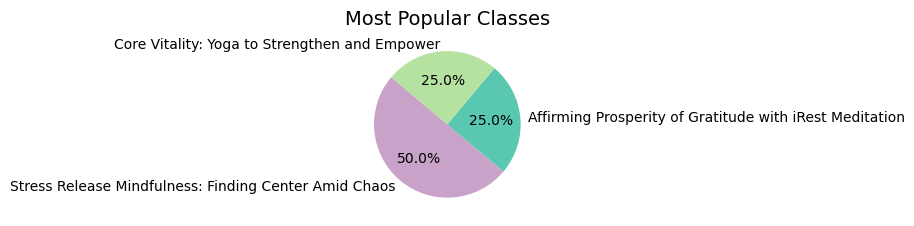

In [29]:
popular_data = org_sub.iloc[27:30, [1, 2]].dropna()
popular_data.columns = ['Class Name', 'Signups']

plt.figure(figsize=(8,8))
plt.pie(popular_data['Signups'],
        labels=popular_data['Class Name'],
        autopct='%1.1f%%',
        startangle=140,
        colors=sofia_palette,
        textprops={'fontsize': 10})
plt.title('Most Popular Classes', fontsize=14)
plt.tight_layout()
plt.show()

